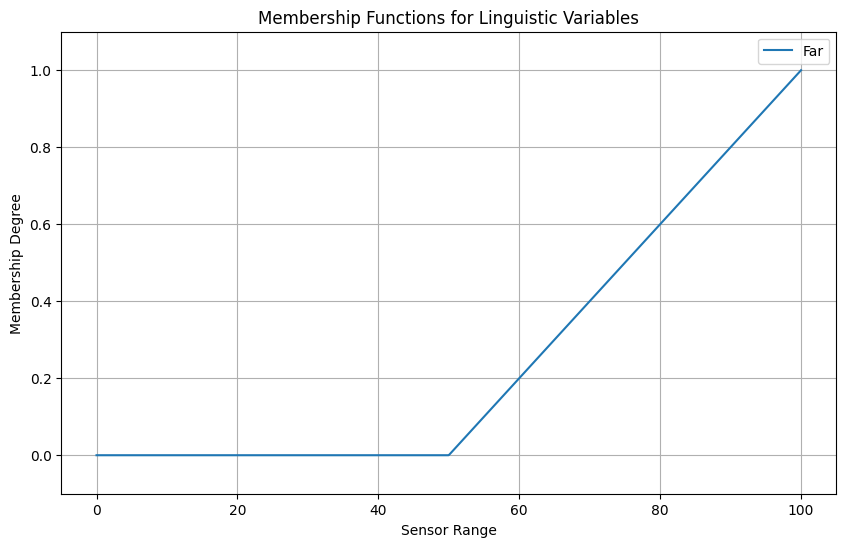

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def membership_far(x, sensor_range):
    peak = sensor_range / 2
    return np.clip((x - peak) / (sensor_range - peak), 0, 1)

def membership_middle(x, sensor_range):
    peak = sensor_range / 2
    width = sensor_range / 4
    return np.clip(1 - abs(x - peak) / width, 0, 1)

def membership_close(x, sensor_range):
    width = sensor_range / 2
    return np.clip(1 - x / width, 0, 1)

# Define the sensor range and create sample input values for the plot
sensor_range = 100
x = np.linspace(0, sensor_range, 1000)

# Calculate membership values for each membership function
far_values = membership_far(x, sensor_range)
middle_values = membership_middle(x, sensor_range)
close_values = membership_close(x, sensor_range)

# Plot the membership functions
plt.figure(figsize=(10, 6))
plt.plot(x, far_values, label='Far')
# plt.plot(x, middle_values, label='Middle')
# plt.plot(x, close_values, label='Close')
plt.xlabel('Sensor Range')
plt.ylabel('Membership Degree')
plt.title('Membership Functions for Linguistic Variables')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_membership(x, l, u, p):
    if x <= l or x >= u:
        return 0.0
    elif l < x <= p:
        return (x - l) / (p - l)
    elif p < x < u:
        return (u - x) / (u - p)
    else:
        return 0.0

# Define the lower bound, upper bound, and peak
l = 10
u = 15
p = 13

# Generate x values for plotting
x_values = np.linspace(l - 2, u + 2, 100)

# Calculate membership values for each x value using the triangular_membership function
membership_values = [triangular_membership(x, l, u, p) for x in x_values]

# Plot the triangular membership function
plt.figure(figsize=(8, 5))
plt.plot(x_values, membership_values, label='Triangular Membership Function')
plt.xlabel('x')
plt.ylabel('Membership Value')
plt.title('Triangular Membership Function Example')
plt.legend()
plt.grid(True)
plt.show()

AttributeError: module 'osmnx' has no attribute 'footprints'

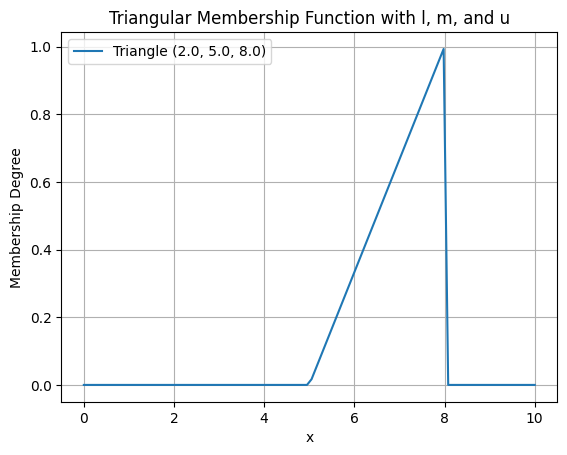

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_membership(x, l, m, u):
    """
    Triangular membership function that returns 0 if l <= x <= m, and 1 if x == u.

    Parameters:
        x (float): The input value.
        l (float): The lower bound of the triangle.
        m (float): The middle point of the triangle.
        u (float): The upper bound of the triangle.

    Returns:
        float: The membership degree of 'x' in the triangular fuzzy set.
    """
    if x == u:
        return 1.0
    elif l <= x <= m:
        return 0.0
    elif m < x < u:
        return (x - m) / (u - m)
    else:
        return 0.0

# Example usage:
x_values = np.linspace(0, 10, 100)
lower_bound = 2.0
middle_point = 5.0
upper_bound = 8.0

membership_degrees = [triangular_membership(x, lower_bound, middle_point, upper_bound) for x in x_values]

# Plot the membership function
plt.plot(x_values, membership_degrees, label=f'Triangle ({lower_bound}, {middle_point}, {upper_bound})')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.title('Triangular Membership Function with l, m, and u')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# Fuzzy sets for temperature
def fuzzy_temperature(temp):
    cold = np.maximum(1 - np.abs((temp - 25) / 25), 0)
    warm = np.maximum(np.minimum((temp - 25) / 25, (75 - temp) / 25), 0)
    hot = np.maximum((temp - 75) / 25, 0)
    return cold, warm, hot

# Fuzzy sets for humidity
def fuzzy_humidity(hum):
    low = np.maximum(1 - np.abs((hum - 50) / 50), 0)
    high = np.maximum((hum - 50) / 50, 0)
    return low, high

# Fuzzy sets for light intensity
def fuzzy_light_intensity(light):
    dim = np.maximum(1 - np.abs((light - 25) / 25), 0)
    bright = np.maximum((light - 25) / 25, 0)
    return dim, bright

# Fuzzy sets for CO2 level
def fuzzy_co2_level(co2):
    low = np.maximum(1 - np.abs((co2 - 50) / 50), 0)
    high = np.maximum((co2 - 50) / 50, 0)
    return low, high

# Fuzzy sets for fan speed
def fuzzy_fan_speed(fan):
    low = np.maximum(1 - np.abs((fan - 25) / 25), 0)
    high = np.maximum((fan - 25) / 25, 0)
    return low, high

# Fuzzy rules table as per the given rules
# [Temperature, Humidity, Light Intensity, CO2 Level, Fan Speed]
fuzzy_rules = [
    [0, 0, 0, 0, 0],   # Cold, Low, Dim, Low -> Low
    [0, 0, 0, 1, 0],   # Cold, Low, Dim, High -> Low
    [0, 0, 1, 0, 1],   # Cold, Low, Bright, Low -> High
    [0, 0, 1, 1, 1],   # Cold, Low, Bright, High -> High
    [0, 1, 0, 0, 0],   # Cold, High, Dim, Low -> Low
    [0, 1, 0, 1, 0],   # Cold, High, Dim, High -> Low
    [0, 1, 1, 0, 1],   # Cold, High, Bright, Low -> High
    [0, 1, 1, 1, 1],   # Cold, High, Bright, High -> High
    [1, 0, 0, 0, 0],   # Warm, Low, Dim, Low -> Low
    [1, 0, 0, 1, 1],   # Warm, Low, Dim, High -> High
    [1, 0, 1, 0, 1],   # Warm, Low, Bright, Low -> High
    [1, 0, 1, 1, 1],   # Warm, Low, Bright, High -> High
    [1, 1, 0, 0, 0],   # Warm, High, Dim, Low -> Low
    [1, 1, 0, 1, 1],   # Warm, High, Dim, High -> High
    [1, 1, 1, 0, 1],   # Warm, High, Bright, Low -> High
    [1, 1, 1, 1, 1],   # Warm, High, Bright, High -> High
    [2, 0, 0, 0, 1],   # Hot, Low, Dim, Low -> High
    [2, 0, 0, 1, 1],   # Hot, Low, Dim, High -> High
    [2, 0, 1, 0, 1],   # Hot, Low, Bright, Low -> High
    [2, 0, 1, 1, 1],   # Hot, Low, Bright, High -> High
    [2, 1, 0, 0, 1],   # Hot, High, Dim, Low -> High
    [2, 1, 0, 1, 1],   # Hot, High, Dim, High -> High
    [2, 1, 1, 0, 1],   # Hot, High, Bright, Low -> High
    [2, 1, 1, 1, 1]    # Hot, High, Bright, High -> High
]

# Fuzzify the input values
def fuzzify_input(temp, hum, light, co2):
    temp_fuzzy = fuzzy_temperature(temp)
    hum_fuzzy = fuzzy_humidity(hum)
    light_fuzzy = fuzzy_light_intensity(light)
    co2_fuzzy = fuzzy_co2_level(co2)
    return temp_fuzzy, hum_fuzzy, light_fuzzy, co2_fuzzy

# Apply fuzzy rules and compute the output
def apply_fuzzy_rules(temp_fuzzy, hum_fuzzy, light_fuzzy, co2_fuzzy):
    output_fuzzy = np.zeros(2)  # Initialize an array to hold the fuzzy output for low and high fan speed

    for rule in fuzzy_rules:
        # Rule format: [Temperature_index, Humidity_index, Light_index, CO2_index, Fan_Speed_index]
        # For each rule, we access the indices corresponding to the temperature, humidity, light intensity, CO2 level,
        # and fan speed

        # Apply the minimum operator between the fuzzy membership degrees of all input variables in the rule.
        # This represents the degree of support for this rule.
        rule_support = np.minimum(temp_fuzzy[rule[0]], hum_fuzzy[rule[1]])
        rule_support = np.minimum(rule_support, light_fuzzy[rule[2]])
        rule_support = np.minimum(rule_support, co2_fuzzy[rule[3]])

        # Update the fuzzy output based on the degree of support for this rule.
        # Use the maximum operator to capture the OR operation implied by the fuzzy rules.
        # If a rule provides support for a certain fan speed, it increases the membership degree of that fan speed in the output_fuzzy array.
        output_fuzzy[rule[4]] = np.maximum(output_fuzzy[rule[4]], rule_support)

    return output_fuzzy

# Centroid defuzzification
def centroid_defuzzification(output_fuzzy):
    fan_speed = fuzzy_fan_speed(np.arange(0, 101, 1))
    return np.sum(fan_speed * output_fuzzy) / np.sum(output_fuzzy)

# Example usage:
temperature_input = 75
humidity_input = 30
light_intensity_input = 40
co2_level_input = 60

temp_fuzzy, hum_fuzzy, light_fuzzy, co2_fuzzy = fuzzify_input(temperature_input, humidity_input, light_intensity_input, co2_level_input)
output_fuzzy = apply_fuzzy_rules(temp_fuzzy, hum_fuzzy, light_fuzzy, co2_fuzzy)
fan_speed_crisp = centroid_defuzzification(output_fuzzy)

print(fan_speed_crisp)

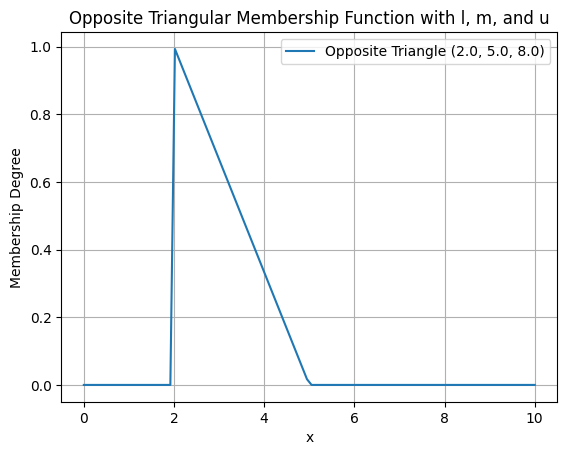

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def opposite_triangular_membership(x, l, m, u):
    """
    Opposite triangular membership function that returns 0 if m <= x <= u, and 1 if x == l.

    Parameters:
        x (float): The input value.
        l (float): The lower bound of the triangle.
        m (float): The middle point of the triangle.
        u (float): The upper bound of the triangle.

    Returns:
        float: The membership degree of 'x' in the opposite triangular fuzzy set.
    """
    if x == l:
        return 1.0
    elif m <= x <= u:
        return 0.0
    elif l < x < m:
        return (m - x) / (m - l)
    else:
        return 0.0

# Example usage:
x_values = np.linspace(0, 10, 100)
lower_bound = 2.0
middle_point = 5.0
upper_bound = 8.0

membership_degrees = [opposite_triangular_membership(x, lower_bound, middle_point, upper_bound) for x in x_values]

# Plot the membership function
plt.plot(x_values, membership_degrees, label=f'Opposite Triangle ({lower_bound}, {middle_point}, {upper_bound})')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.title('Opposite Triangular Membership Function with l, m, and u')
plt.legend()
plt.grid(True)
plt.show()

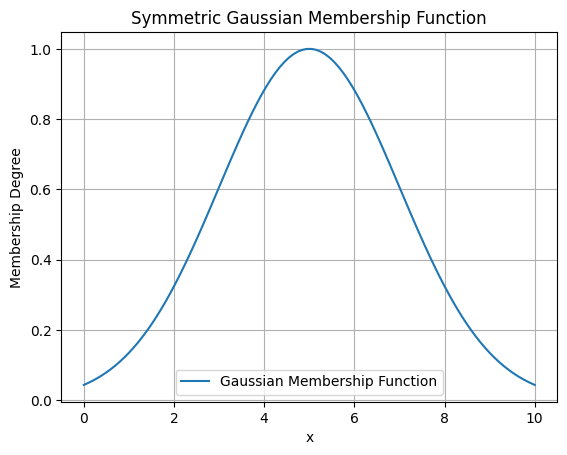

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_membership(x, mean, std_dev):
    """
    Gaussian (normal distribution) membership function.

    Parameters:
        x (float): The input value.
        mean (float): The mean (central point) of the Gaussian distribution.
        std_dev (float): The standard deviation (width) of the Gaussian distribution.

    Returns:
        float: The membership degree of 'x' in the Gaussian fuzzy set.
    """
    return np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Example usage:
x_values = np.linspace(0, 10, 100)
mean_value = 5.0
std_deviation = 2.0

membership_degrees = [gaussian_membership(x, mean_value, std_deviation) for x in x_values]

# Plot the Gaussian membership function
plt.plot(x_values, membership_degrees, label='Gaussian Membership Function')
plt.xlabel('x')
plt.ylabel('Membership Degree')
plt.title('Symmetric Gaussian Membership Function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def centroid_defuzzification(results, w):
    weighted_sum = 0
    total_area = 0
#todo: change 1* to w* and -1* to -w*
    for output, area in results:
        if output == 'turn right':
            weighted_sum += w * area
            total_area += area
        elif output == 'turn left':
            weighted_sum += -w * area
            total_area += area
        # For 'straight', we do not update the weighted_sum as it has no angular change

    if total_area == 0:
        return 0

    return weighted_sum / total_area

In [2]:
import osmnx as ox

# Define the bounding box for Astana (replace with the actual coordinates)
north, south, east, west = 51.1949, 51.0476, 71.5481, 71.2990

# Download the OSM data for Astana
graph = ox.graph_from_bbox(north, south, east, west, network_type="drive")
# Export the graph as a Yaml file
ox.save_graphml(graph, filepath="astana.osm")